# Pymaceuticals Inc.
---

### Analysis
- From the box plot and the calculations leading up to it we can see that of the 4 drugs examined, only Infubinol had noticeable outliers requiring further examination.
- The final scatterplots for mouse weight to tumor size under the Capomulin regimen shows a very strong linear relationship given the Pearson correlation of .84, indicating a conclusion can be drawn that the higher the mouse weight, the larger the average tumor seen.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mouse_count_start = len(mouse_study_data["Mouse ID"].unique())
mouse_count_start

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_duplicates = mouse_study_data[mouse_study_data[['Mouse ID','Timepoint']].duplicated() == True]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate = mouse_study_data.loc[mouse_study_data['Mouse ID'] == "g989"]
mouse_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_data.copy()
mouse_study_df = mouse_study_df[~mouse_study_df.isin(mouse_duplicate)].dropna()
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.000000,0.0,Capomulin,Female,9.0,22.0
1,b128,5.0,45.651331,0.0,Capomulin,Female,9.0,22.0
2,b128,10.0,43.270852,0.0,Capomulin,Female,9.0,22.0
3,b128,15.0,43.784893,0.0,Capomulin,Female,9.0,22.0
4,b128,20.0,42.731552,0.0,Capomulin,Female,9.0,22.0


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_study_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_grouped_mean = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().reset_index()
regimen_grouped_mean = regimen_grouped_mean.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
regimen_grouped_median = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().reset_index()
regimen_grouped_median = regimen_grouped_median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
regimen_grouped_variance = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().reset_index()
regimen_grouped_variance = regimen_grouped_variance.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
regimen_grouped_stdev = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().reset_index()
regimen_grouped_stdev = regimen_grouped_stdev.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
regimen_grouped_sem = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().reset_index()
regimen_grouped_sem = regimen_grouped_sem.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM"})

regimen_grouped_summary = pd.merge(regimen_grouped_mean,regimen_grouped_median,how="left",on=["Drug Regimen"])
regimen_grouped_summary["Tumor Volume Variance"] = regimen_grouped_variance["Tumor Volume Variance"]
regimen_grouped_summary["Tumor Volume Std. Dev."] = regimen_grouped_stdev["Tumor Volume Std. Dev."]
regimen_grouped_summary["Tumor Volume Std. Err."] = regimen_grouped_sem["Tumor Volume SEM"]
regimen_grouped_summary.set_index("Drug Regimen")

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summ_stat = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].describe()
summ_stat

# Using the aggregation method, produce the same summary statistics in a single line.
grouped_drugs = mouse_study_df.groupby(["Drug Regimen"])
summary_stat_table = grouped_drugs["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_stat_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts


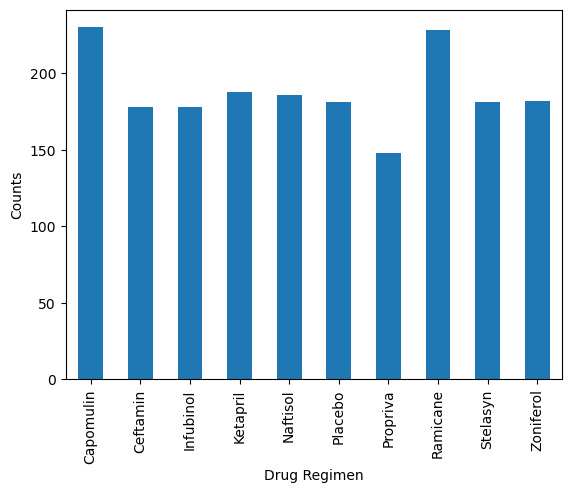

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

summ_stat["count"].plot(kind="bar")
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')
plt.show()


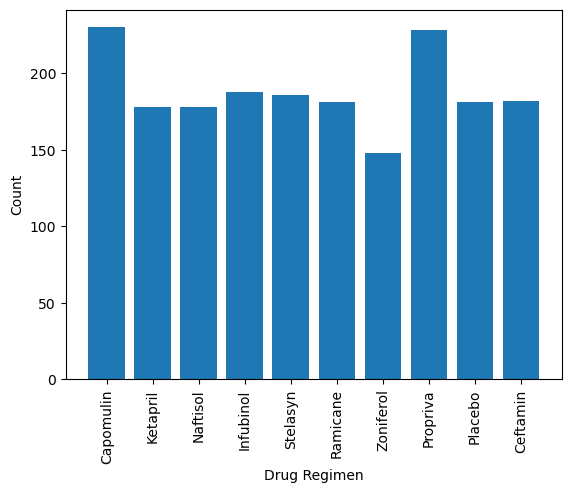

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mouse_study_df["Drug Regimen"].unique(),summ_stat["count"])
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.show()


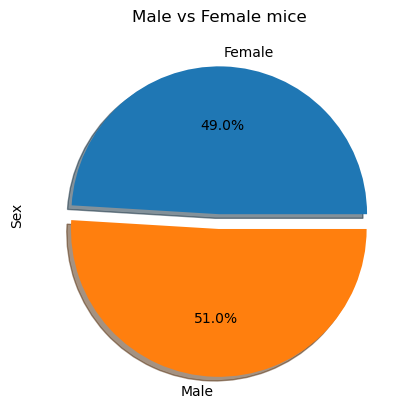

In [40]:

# Calculate totals of unique Mouse ID by gender 
gender_count = mouse_study_df.groupby("Sex")['Sex'].count()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count_pie = mice_sex.plot(kind = "pie", title ='Male vs Female mice', legend= False,  autopct='%1.1f%%', explode=(0,0.1), shadow = True, startangle = 0)


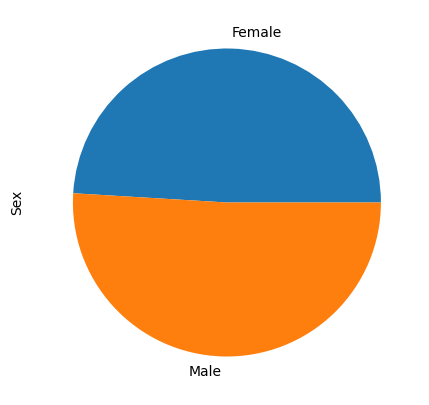

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female","Male"]
plot = gender_count.plot.pie(y='genders', figsize=(5, 5))



## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_df.copy()
last_timepoint = last_timepoint.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# #Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data = pd.merge(last_timepoint_df,mouse_study_df,how="inner",on=["Mouse ID","Timepoint"])
final_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45.0,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45.0,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45.0,70.717621,4.0,Placebo,Female,17.0,29.0
3,a275,45.0,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30.0,63.440686,1.0,Stelasyn,Female,16.0,29.0
...,...,...,...,...,...,...,...,...
243,z435,10.0,48.710661,0.0,Propriva,Female,12.0,26.0
244,z578,45.0,30.638696,0.0,Ramicane,Male,11.0,16.0
245,z581,45.0,62.754451,3.0,Infubinol,Female,24.0,25.0
246,z795,45.0,65.741070,3.0,Naftisol,Female,13.0,29.0


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

drug_vol_df = final_data[["Drug Regimen","Mouse ID","Tumor Volume (mm3)","Timepoint","Weight (g)"]]
capo_data = drug_vol_df.loc[drug_vol_df['Drug Regimen'] == "Capomulin"].reset_index()
rami_data = drug_vol_df.loc[drug_vol_df['Drug Regimen'] == "Ramicane"].reset_index()
infu_data = drug_vol_df.loc[drug_vol_df['Drug Regimen'] == "Infubinol"].reset_index()
ceft_data = drug_vol_df.loc[drug_vol_df['Drug Regimen'] == "Ceftamin"].reset_index()


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {"Capomulin":capo_data["Tumor Volume (mm3)"],
                  "Ramicane":rami_data["Tumor Volume (mm3)"],
                  "Infubinol":infu_data["Tumor Volume (mm3)"],
                  "Ceftamin":ceft_data["Tumor Volume (mm3)"]}

# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol_df = pd.DataFrame(tumor_vol_data)
tumor_vol_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    quartiles = tumor_vol_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
# Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    lower_out = tumor_vol_df[tumor_vol_df[drug] <= lower_bound]
    upper_out = tumor_vol_df[tumor_vol_df[drug] >= upper_bound]
    print(f"{drug}'s potential outliers: {lower_out} and {upper_out}")
    
    



Capomulin's potential outliers: Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: [] and Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: [] and Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: []
Infubinol's potential outliers:    Capomulin   Ramicane  Infubinol   Ceftamin
5  47.685963  33.397653  36.321346  47.784682 and Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: []
Ceftamin's potential outliers: Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: [] and Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: []


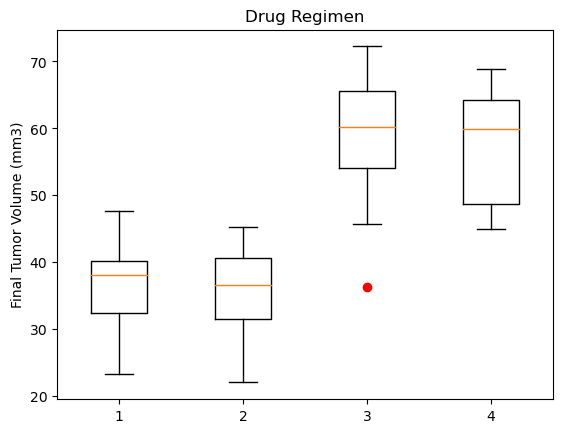

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_df,sym="red")
# x_axis = np.arange(len(drugs))
# tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations,drugs)
plt.show()



## Line and Scatter Plots


Text(0.5, 1.0, 'Capomulin Treatment of Mouse B128')

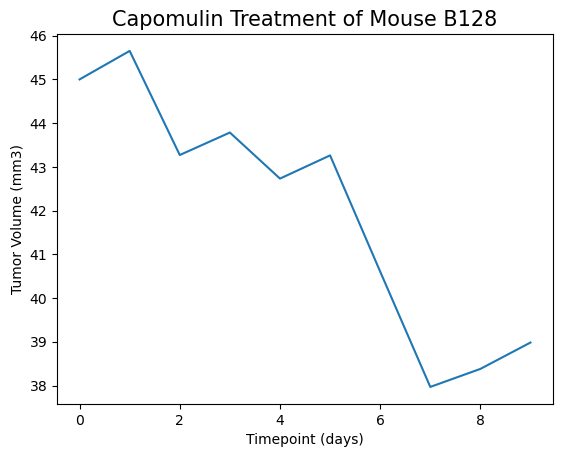

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "b128"]
b128_data["Tumor Volume (mm3)"].plot()
plt.xlabel("Timepoint (days)", size = 10)
plt.ylabel("Tumor Volume (mm3)", size = 10)
plt.title("Capomulin Treatment of Mouse B128", size = 15)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

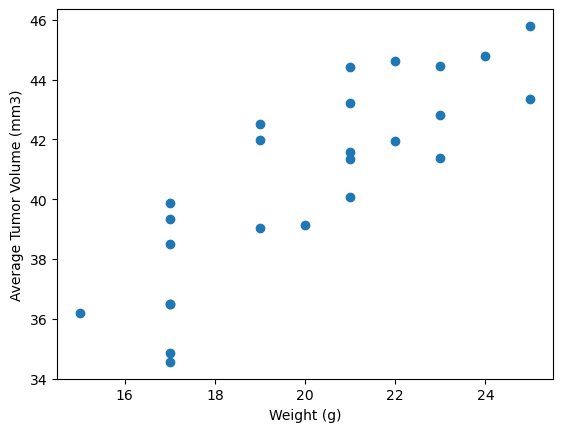

In [33]:
# Find Avg Tumor Volume per Mouse ID
avg_tumor_vol = mouse_study_df.copy()
avg_tumor_vol = avg_tumor_vol.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].mean()
avg_tumor_df = pd.DataFrame(avg_tumor_vol)
avg_tumor_df = avg_tumor_df.rename(columns = {"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
capo_data_df = pd.merge(capo_data,avg_tumor_df, how="left", on = "Mouse ID")

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
vol_weight = plt.scatter(capo_data["Weight (g)"],capo_data_df["Average Tumor Volume (mm3)"])
plt.xlabel("Weight (g)", size = 10)
plt.ylabel("Average Tumor Volume (mm3)", size = 10)


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8419363424694722.


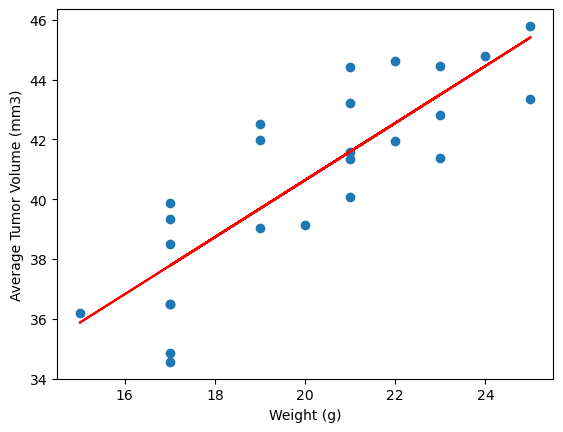

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = capo_data["Weight (g)"].corr(capo_data_df["Average Tumor Volume (mm3)"])
slope, intercept, rvalue, pvalue, stderr = linregress(capo_data["Weight (g)"], capo_data_df["Average Tumor Volume (mm3)"])
regress_values = capo_data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capo_data["Weight (g)"],capo_data_df["Average Tumor Volume (mm3)"])
plt.plot(capo_data["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume is {correlation}.")
plt.show()